In [54]:
import numpy as np
import pandas as pd

In [55]:
df = pd.read_csv("lost_items.csv")

In [56]:
df

,Image Name,Location,Timestamp,Embedding,Description,Status,Owner Details
0,1740881279_img1.jpg,East Campus - CU Boulder East Library,2025-03-01 19:08:00,"[[0.04269040748476982, 0.010722422040998936, -...",red bag,Lost,NaN
1,1740881669_img3.jpg,CU Boulder - Fiske Planetarium,2025-03-01 19:14:29,"[[0.015431628562510014, -0.03173978999257088, ...",spex,Lost,NaN
2,1740881932_1740872659_eds flight.jpg,CU Boulder - Engineering Center,2025-03-01 19:18:52,"[[-0.029692407697439194, 0.0012477620039135218...",NaN,Lost,NaN
3,1740883389_1740872825_cu boulder trees3.png,East Campus - Research Park,2025-03-01 19:43:10,"[[-0.015019345097243786, -0.000423260818934068...",NaN,Lost,NaN
4,1740884359_img2.jpg,"East Campus - Sustainability, Energy, and Envi...",2025-03-01 19:59:19,"[[0.09570323675870895, 0.004644457250833511, 2...",NaN,Lost,NaN


In [57]:
locations = pd.read_excel("locations.xlsx")

In [58]:
locations

,Campus,Building,Contact Email
0,CU Boulder,Engineering Center,engcenter@colorado.edu
1,CU Boulder,Norlin Library,norlin@colorado.edu
2,CU Boulder,Mathematics Building,mathbuilding@colorado.edu
3,CU Boulder,Recreation Center,reccenter@colorado.edu
4,CU Boulder,Leeds School of Business,leeds@colorado.edu
5,CU Boulder,Fiske Planetarium,fiske@colorado.edu
6,East Campus,"Sustainability, Energy, and Environment Commun...",seec@colorado.edu
7,East Campus,Jennie Smoly Caruthers Biotech Building,biotech@colorado.edu
8,East Campus,Research Park,researchpark@colorado.edu
9,East Campus,CU Boulder East Library,eastlibrary@colorado.edu


In [59]:
#pip install openpyxl==3.1.0

In [60]:
import os
folder_path = 'C:\\Users\\trrsh\\Downloads\\hackCU11\\lost-found-local\\lost_items'  

files_in_folder = os.listdir(folder_path)
files_in_folder

['01KJW9YP808Z.jpg',
 '05FRVCPGYRC5.jpg',
 '08P9Y5WESDAI.jpg',
 '09ZB0FN9CLG8.jpg',
 '0CVE6T214FIN.jpg',
 '0FAV75WLXF8D.jpg',
 '0G4GOXY0V48S.jpg',
 '0JR878FZ9ZQ2.jpg',
 '0ZPYPPV0SPZN.jpg',
 '1.jpg',
 '14.jpg',
 '15ZSQZN6TRCL.jpg',
 '17289317477636066435262077181670 - Ikjot Singh(1).jpg',
 '17289643656751376731998272859075 - Prarthana Samal.jpg',
 '17289645458221497126445436588472 - Prarthana Samal.jpg',
 '1740881279_img1.jpg',
 '1740881296_img2.jpg',
 '1740881669_img3.jpg',
 '1740881932_1740872659_eds flight.jpg',
 '1740883389_1740872825_cu boulder trees3.png',
 '1740884359_img2.jpg',
 '1740891687_captured_image.jpg',
 '1IUI89D113QR.jpg',
 '1Q46S1TA0UQB.jpg',
 '2.jpg',
 '20241014_183738 - Akshita.jpg',
 '21_jpg.rf.2ed8bdc3af836fe8d1f66c57e085b40d.jpg',
 '24_jpg.rf.dcc85cf678097cca2de0b6637883d66d.jpg',
 '28IVW8QNCABD.jpg',
 '2AL9I44L6N82.jpg',
 '2CED6NFDZDV6.jpg',
 '2GMDJ7F1NG5R.jpg',
 '2XPBELTH2IGE.jpg',
 '3.jpg',
 '33.jpg',
 '35.jpg',
 '37_jpg.rf.0459a9f95aa36f845beb927ac90e8189.jpg'

In [61]:
import streamlit as st
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import os
import time
import pandas as pd
from datetime import datetime
from pathlib import Path
import hashlib
import random


# Load the CLIP model and processor (only once at startup)
def load_model():
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32", padding=True)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    return model, processor, device

model, processor, device = load_model()

def encode_image(path):
    try:
        file_path  = folder_path + '\\'+ path
        image = Image.open(file_path)
        image = image.resize((224, 224))  # Resize the image (if needed)
        inputs = processor(images=image, return_tensors="pt", padding=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}  
        with torch.no_grad():  
            outputs = model.get_image_features(**inputs)  
        return outputs.tolist()
    except Exception as e:
        return f"Error loading image: {e}"
    
    
def get_random_location():
    row = locations.sample(n=1).iloc[0]
    return f"{row['Campus']} - {row['Building']}"

def get_random_timestamp():
    start_date = datetime(2025, 3, 1)
    end_date = datetime(2025, 3, 3, 23, 59, 59)
    random_time = start_date + (end_date - start_date) * random.random()
    return random_time

C:\Users\trrsh\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\trrsh\anaconda3\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.ser

In [62]:
def update_dataframe(files_in_folder, df):
    for file in files_in_folder:
        print(file)
        if file not in df['Image Name'].values:
            df.loc[len(df)] = [
                file,
                get_random_location(),
                get_random_timestamp(),
                encode_image(file),
                pd.NA, 
                'Lost', 
                pd.NA
            ]

In [63]:
update_dataframe(files_in_folder, df)

01KJW9YP808Z.jpg
05FRVCPGYRC5.jpg
08P9Y5WESDAI.jpg
09ZB0FN9CLG8.jpg
0CVE6T214FIN.jpg
0FAV75WLXF8D.jpg
0G4GOXY0V48S.jpg
0JR878FZ9ZQ2.jpg
0ZPYPPV0SPZN.jpg
1.jpg
14.jpg
15ZSQZN6TRCL.jpg
17289317477636066435262077181670 - Ikjot Singh(1).jpg
17289643656751376731998272859075 - Prarthana Samal.jpg
17289645458221497126445436588472 - Prarthana Samal.jpg
1740881279_img1.jpg
1740881296_img2.jpg
1740881669_img3.jpg
1740881932_1740872659_eds flight.jpg
1740883389_1740872825_cu boulder trees3.png
1740884359_img2.jpg
1740891687_captured_image.jpg
1IUI89D113QR.jpg
1Q46S1TA0UQB.jpg
2.jpg
20241014_183738 - Akshita.jpg
21_jpg.rf.2ed8bdc3af836fe8d1f66c57e085b40d.jpg
24_jpg.rf.dcc85cf678097cca2de0b6637883d66d.jpg
28IVW8QNCABD.jpg
2AL9I44L6N82.jpg
2CED6NFDZDV6.jpg
2GMDJ7F1NG5R.jpg
2XPBELTH2IGE.jpg
3.jpg
33.jpg
35.jpg
37_jpg.rf.0459a9f95aa36f845beb927ac90e8189.jpg
3TILVIASGTZC.jpg
3U45VSOXPZBY.jpg
41lVum876fL._AC_UF894,1000_QL80_ - Achintya Agrawal(1).jpg
433Q3I340X9N.jpg
44_jpg.rf.e0dbf959d83dd0ff71a3ea41fe

In [64]:
df

,Image Name,Location,Timestamp,Embedding,Description,Status,Owner Details
0,1740881279_img1.jpg,East Campus - CU Boulder East Library,2025-03-01 19:08:00,"[[0.04269040748476982, 0.010722422040998936, -...",red bag,Lost,NaN
1,1740881669_img3.jpg,CU Boulder - Fiske Planetarium,2025-03-01 19:14:29,"[[0.015431628562510014, -0.03173978999257088, ...",spex,Lost,NaN
2,1740881932_1740872659_eds flight.jpg,CU Boulder - Engineering Center,2025-03-01 19:18:52,"[[-0.029692407697439194, 0.0012477620039135218...",NaN,Lost,NaN
3,1740883389_1740872825_cu boulder trees3.png,East Campus - Research Park,2025-03-01 19:43:10,"[[-0.015019345097243786, -0.000423260818934068...",NaN,Lost,NaN
4,1740884359_img2.jpg,"East Campus - Sustainability, Energy, and Envi...",2025-03-01 19:59:19,"[[0.09570323675870895, 0.004644457250833511, 2...",NaN,Lost,NaN
...,...,...,...,...,...,...,...
201,ZHSWB4RG2N7M.jpg,CU Boulder - Norlin Library,2025-03-03 19:19:35.744278,"[[-0.20796458423137665, 0.22803446650505066, 0...",NaN,Lost,NaN
202,ZLAQACP4L324.jpg,CU Boulder - Engineering Center,2025-03-03 21:54:35.241561,"[[0.3309551477432251, 0.029495656490325928, 0....",NaN,Lost,NaN
203,ZQPYIXRA0I2S.jpg,CU Boulder - Engineering Center,2025-03-01 03:33:41.531742,"[[0.4746719002723694, 0.21900907158851624, 0.1...",NaN,Lost,NaN
204,ZYY923QREDHO.jpg,CU Boulder - Engineering Center,2025-03-03 14:44:38.497075,"[[-0.27591943740844727, 0.6210845708847046, 0....",NaN,Lost,NaN


01KJW9YP808Z.jpg


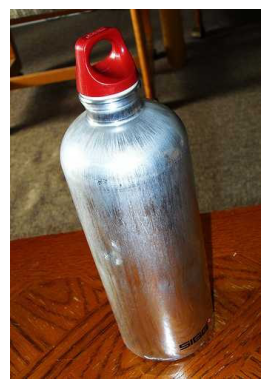

In [41]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

for i in files_in_folder:
    print(i)
    path  = folder_path + '\\'+ i
    image = Image.open(path)
    # Plot the image
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.show()
    break

In [65]:
df.to_csv("lost_items.csv", index=False)